In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
from IPython.html.widgets import interact
%matplotlib inline

/Users/knysmchr/opt/anaconda3/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


In [2]:
plt.style.use('ggplot')
np.random.seed(123)

In [3]:
mu = np.array([1, 2])
cov = np.array([[1.0, 0.7], [0.7, 1.0]])

In [4]:
x = np.arange(-2, 4, 0.01)
y = np.arange(-1, 5, 0.01)
X, Y = np.meshgrid(x, y)
pos = np.zeros([X.shape[0], X.shape[1],2])
pos[:,:,0] = X
pos[:,:,1] = Y

Text(0, 0.5, '$x_{2}$')

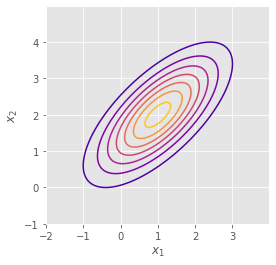

In [5]:
rv = multivariate_normal(mu,cov)
plt.figure(figsize=(4,4))
plt.contour(X, Y, rv.pdf(pos), cmap='plasma')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')

In [9]:
NMCS = 500
sigma12 = cov[1,0]
sigma1 = cov[0,0] ** 0.5
sigma2 = cov[1,1] ** 0.5
rho = sigma12 / (sigma1*sigma2)
z1 = 0.0
z2 = 0.0
z1_mcs = [z1]
z2_mcs = [z2]
for i in range(NMCS):
    #f(z1|z2)
    z1 = norm.rvs(loc=rho*z2, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
    #f(z2|z1)
    z2 = norm.rvs(loc=rho*z1, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
df1 = pd.DataFrame(mu[0] + np.array(z1_mcs) * sigma1)
df2 = pd.DataFrame(mu[1] + np.array(z2_mcs) * sigma2)

In [10]:
df1.head()

,0
0,1.000000
1,0.465230
2,0.465230
3,1.534565
4,1.534565


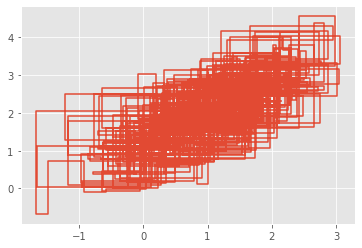

In [11]:
plt.plot(df1[0],df2[0])

In [12]:
@interact(mcs=(0,100,1))
def animation(mcs=0):
    plt.contour(X, Y, rv.pdf(pos), cmap='plasma')
    plt.xlim([-3.0, 4.5])
    plt.ylim([-1.0, 5.0])
    plt.plot(df1[0][:mcs], df2[0][:mcs])
    plt.show()

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))